In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt

In [2]:
# select the start range, and import the stock data

portfolio= ['AAPL','MSFT','IBM','TWTR']

start= dt.datetime(2020,1,1)

df = web.DataReader(portfolio,'yahoo',start)
df= pd.DataFrame(df)
df = df['Adj Close']

# Sharpe Ratio

In [3]:
# We find the log returns of our portfolio

returns= np.log(df/df.shift())

In [4]:
# randomly assign weights to each stock in our portfolio

weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.52627855, 0.36067836, 0.08101089, 0.0320322 ])

In [5]:
# caluclate the expected returns and std dev on annual basis

exp_returns = np.sum(returns.mean()*weight)*252

#exp_std = np.sum(returns.std()*252)
exp_std = np.sqrt(np.dot(weight.T,np.dot(returns.cov()*252,weight)))

In [6]:
# calculate sharpe ratio

sharpe_ratio= exp_returns / exp_std
sharpe_ratio 

0.9215834648210143

##Monte Carlo Simulation

In [7]:
# Monte Carlo Simulation n= 500

n=5000

weights = np.zeros((n,4))

exp_rtns=np.zeros(n)
exp_vols=np.zeros(n)
sharpe= np.zeros(n)

for i in range(n):
  weight = np.random.random(4)
  weight /= weight.sum()
  weights[i] = weight

  exp_rtns[i] = np.sum(returns.mean()*weight)*252
  exp_vols[i] = np.sqrt(np.dot(weight.T,np.dot(returns.cov()*252,weight)))
  sharpe[i] = exp_rtns[i] / exp_vols[i]


In [8]:
# maximum value of sharpe ratio among all simulations

sharpe.max()

0.9511329937080357

In [9]:
# location of the highest sharpe ratio

sharpe.argmax()

1250

In [10]:
# weights of the portfolio having highest sharpe ratio

weights[sharpe.argmax()]

array([0.60854201, 0.23753416, 0.00672373, 0.1472001 ])

Text(0, 0.5, 'Expected Return')

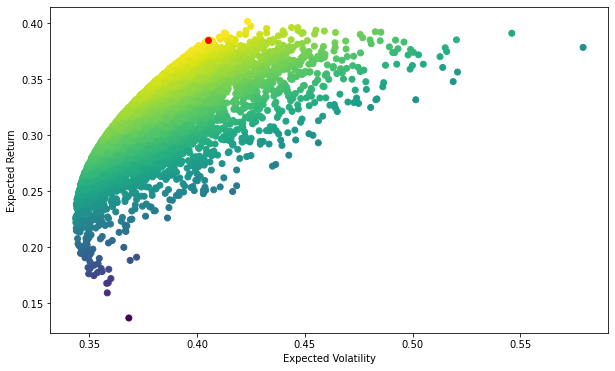

In [11]:
# plotting the frontier and the portfolio with highest sharpe ratio

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(exp_vols,exp_rtns, c = sharpe)
ax.scatter(exp_vols[sharpe.argmax()],exp_rtns[sharpe.argmax()], color='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

## Correlation

In [12]:
# correlation amongst our portfolio

df.corr()

Symbols,AAPL,MSFT,IBM,TWTR
Symbols,,,,
AAPL,1.000000,0.932599,0.293835,0.823040
MSFT,0.932599,1.000000,0.379854,0.865332
IBM,0.293835,0.379854,1.000000,0.425768
TWTR,0.823040,0.865332,0.425768,1.000000


In [13]:
# adding S&P 500 and scaling the data

sp500 = web.DataReader('^GSPC','yahoo',start)
df['SP500']= sp500['Adj Close']
df= np.log(df/df.shift())
df
returns['SP500'] =df['SP500']
returns

Symbols,AAPL,MSFT,IBM,TWTR,SP500
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.008007,-0.024445,-0.007085
2020-01-06,0.007937,0.002582,-0.001788,0.003800,0.003527
2020-01-07,-0.004714,-0.009160,0.000671,0.028048,-0.002807
2020-01-08,0.015958,0.015803,0.008312,0.015551,0.004890
...,...,...,...,...,...
2021-04-28,-0.006045,-0.028693,0.006947,-0.004707,-0.000846
2021-04-29,-0.000749,-0.008086,0.008634,-0.009328,0.006740
2021-04-30,-0.015249,-0.001308,-0.016497,-0.164446,-0.007221


In [14]:
# correlation with S&P 500

df.corr()

Symbols,AAPL,MSFT,IBM,TWTR,SP500
Symbols,,,,,
AAPL,1.000000,0.827251,0.500062,0.526543,0.811582
MSFT,0.827251,1.000000,0.567227,0.546106,0.865147
IBM,0.500062,0.567227,1.000000,0.363549,0.773973
TWTR,0.526543,0.546106,0.363549,1.000000,0.592002
SP500,0.811582,0.865147,0.773973,0.592002,1.000000


In [15]:
# adding a new ticker and calculating correlation with S&P 500

def test_correlation(ticker):
   df = web.DataReader(ticker,'yahoo', start)
   lr = returns.copy()
   lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
   return lr.corr()

In [16]:
test_correlation('LQD')

Symbols,AAPL,MSFT,IBM,TWTR,SP500,LQD
Symbols,,,,,,
AAPL,1.000000,0.827251,0.500062,0.526543,0.811582,0.268120
MSFT,0.827251,1.000000,0.567227,0.546106,0.865147,0.272676
IBM,0.500062,0.567227,1.000000,0.363549,0.773973,0.254539
TWTR,0.526543,0.546106,0.363549,1.000000,0.592002,0.266391
SP500,0.811582,0.865147,0.773973,0.592002,1.000000,0.328951
LQD,0.268120,0.272676,0.254539,0.266391,0.328951,1.000000


In [17]:
test_correlation('TLT')

Symbols,AAPL,MSFT,IBM,TWTR,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.827251,0.500062,0.526543,0.811582,-0.313812
MSFT,0.827251,1.000000,0.567227,0.546106,0.865147,-0.321515
IBM,0.500062,0.567227,1.000000,0.363549,0.773973,-0.429749
TWTR,0.526543,0.546106,0.363549,1.000000,0.592002,-0.133187
SP500,0.811582,0.865147,0.773973,0.592002,1.000000,-0.435061
TLT,-0.313812,-0.321515,-0.429749,-0.133187,-0.435061,1.000000


In [18]:
# visualizing correlation of S&P500 with another ticker

def visualize_correlation(ticker1,ticker2):
  df = web.DataReader([ticker1,ticker2],'yahoo',start)
  df = df['Adj Close']
  df= df/df.iloc[0]
  fig, ax = plt.subplots()
  df.plot(ax=ax)

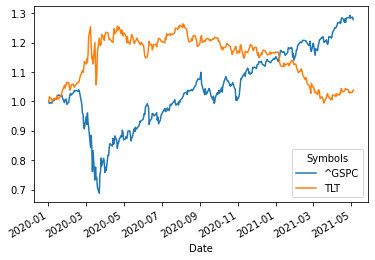

In [19]:
visualize_correlation('^GSPC','TLT')

## Beta

In [20]:
# linear regression for two tickers and plot them

from sklearn.linear_model import LinearRegression

def linear_regression(a, b):

  x = returns[a].iloc[1:].to_numpy().reshape(-1,1)
  y = returns[b].iloc[1:].to_numpy().reshape(-1,1)

  linear = LinearRegression()
  linear.fit(x,y)


  y_pred = linear.predict(x)


  alpha = linear.intercept_[0]
  beta = linear.coef_[0,0]


  fig, ax = plt.subplots()
  ax.set_title("Alpha: " + str(round(alpha,5)) + ", Beta: " + str(round(beta,3)))
  ax.scatter(x,y)
  ax.plot(x,y_pred, c='r')

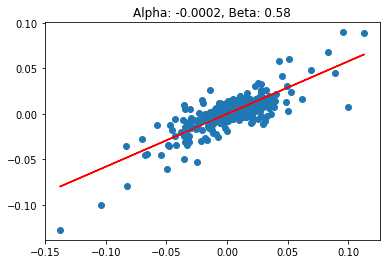

In [21]:
# linear regression and beta value

linear_regression("AAPL", "SP500")

In [28]:
# beta = covariance/variance

# calculate covariance

covariance = df.cov()

In [29]:
# calculate variance of market

variance = df['SP500'].var()
variance

0.0003800658257520733

In [31]:
# calculate Apple beta
beta = covariance.loc['AAPL','SP500']/variance
print("Beta: " + str(beta))

Beta: 1.1359621071334838


In [36]:
# beta of the portfolio

df.cov().loc['SP500']/df['SP500'].var()

Symbols
AAPL     1.135962
MSFT     1.117255
IBM      0.959060
TWTR     1.184116
SP500    1.000000
Name: SP500, dtype: float64

## CAPM

In [38]:
# CAPM = riskfree rate + beta*(market risk premium)

rf = 0.01

# market risk premium = market - risk free rate

mrp= 0.09

expected_return = rf + beta*(mrp)

In [40]:
# expected return for the portfolio

expected_return

0.11223658964201354